In [1]:
%pylab inline
import pandas as pd
from scipy import stats
from sympy import *

Populating the interactive namespace from numpy and matplotlib


# Teoría de Hipótesis
Otra manera de hacer inferencia es haciendo pruebas de hipótesis, esto es, intentar corroborar una afirmación acerca de una población bajo estudio. Esta afirmación puede estar basada en alguna creencia o experiencia pasada y la contrastamos la evidencia que nosotros obtengamos de la muestra.

Una prueba de hipótesis comprende cuatro componentes principales:
* __Hipótesis Nula__ $H_{0}$, es lo que queremos desacreditar. 
$\boxed{ H_{0}:\mu = \mu_{0}}  \;   \boxed{ H_{0}:\mu \leq  \mu_{0}}  \;   \boxed{ H_{0}:\mu \geq  \mu_{0}}$
* __Hipótesis Alternativa__ $H_{1}$, es la que responde nuestra pregunta, la que se establece en base a la evidencia que tenemos. Puede tener cuatro formas: $\boxed{ H_{1}:\mu = \mu_{0}}  \; \boxed{ H_{1}:\mu < \mu_{0}}  \;  \boxed{ H_{1}:\mu >  \mu_{0}}  \;   \boxed{ H_{1}:\mu \neq   \mu_{0}}$
* __Estadístico de Prueba__, son los estadisticos de nuestra muestra y en él basamos nuestra decisión acerca de si rechazar o no rechazar $H_{0}$
* __Región de Rechazo__, es el conjunto de valores tales que si la prueba estadística cae dentro de este rango, decidimos rechazar $H_{0}$

## Vamos a verlo con un ejemplo

Unos estudiantes sacan las siguientes notas: [ 109.4, 76.2, 128.7, 93.7, 85.6,117.7, 117.2, 87.3, 100.3, 55.1]. 

Son peores estudiantes que los estudiantes de todo el pais que tienen una media de 110 ?

* __$H_{0}$__ = Los estudiantes de la muestra están en la media nacional. $\boxed{ H_{0}:\mu = \mu_{0}}$
* __$H_{1}$__ = Los estudiantes de la muestra están por debajo la media nacional. $\boxed{ H_{1}:\mu \leq \mu_{0}}$
* __Estadístico de prueba__ = usaremos la media muestral que como hemos visto en Teoría de muestreo sigue una distribución t de Student con n-1 grados de liberta

In [2]:
muestra = np.array([109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.1])

In [3]:
mediapoblacion=110
mediamuestra = muestra.mean()
mediamuestra

97.11999999999999

In [4]:
varianzamuestra = muestra.std()
varianzamuestra

21.045465069700885

In [5]:
110 - 97.1 

12.900000000000006

In [6]:
#Estadístico
def VarTStudent(x,m,s,n):
    return (x-m)/(s/np.sqrt(n))

mi_t=stats.t(9)

Como las conclusiones a las que lleguemos se basan en una muestra, hay posibilidades de que nos equivoquemos. Estos son todos los posibles casos.

<table>
  <tr>
    <th></th>
    <th><center>$H_{0}$ Verdadera</center></th>
    <th><center>$H_{0}$ Falsa</center></th>
  </tr>
  <tr>
      <td><b><center>Rechazamos H 0</center></b></td>
      <td><center>Error Tipo I<br>P(error Tipo I) = $\alpha$</center></td>
      <td><center>Decisión Correcta</center></td>
  </tr>
  <tr>
    <td><center><b>No Rechazamos H 0</b></center></td>
    <td><center>Decisión Correcta</center></td>
    <td><center>Error Tipo II<br>P(error Tipo II) = $\beta$</center></td>
  </tr>
</table>

La Probabilidad de cometer un error Tipo I se conoce como __Nivel de Significancia__, se denota como $\alpha$ y es el tamaño de la __región de rechazo__.
El complemento de la región de rechazo es $1−\alpha$ y es conocido como el __Coeficiente de Confianza__

En algunos casos la hipótesis se rechaza cuando  $\alpha < 0.05$ y en otros cuando $\alpha < 0.01$

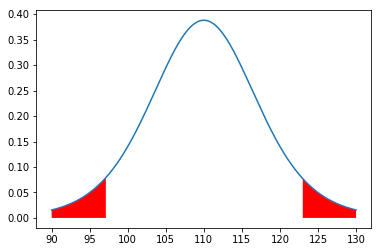

In [7]:
x=np.linspace(90,130,1000)
d=list(map(mi_t.pdf,VarTStudent(x,mediapoblacion,varianzamuestra,9)))
plt.plot(x,d)

x1=np.linspace(90,97.12,1000)
d1=list(map(mi_t.pdf,VarTStudent(x1,mediapoblacion,varianzamuestra,9)))
plt.fill_between(x=x1,y1=d1,facecolor="red")

x2=np.linspace(123,130,1000)
d2=list(map(mi_t.pdf,VarTStudent(x2,mediapoblacion,varianzamuestra,9)))
plt.fill_between(x=x2,y1=d2,facecolor="red")

En esta gráfica la __región de rechazo__ es la zona roja.

Calculo la probabilidad de que la media muestral no esté en la región de rechazo, esto es P(97.1 < X < 122,9) = $\alpha$

Para mas detalle http://lcolladotor.github.io/courses/Courses/MEyAdDG/day2/Pruebas%20de%20Hip%C3%B3tesis.pdf

In [8]:
stats.t(9).cdf(VarTStudent(97.1,110,21.04,9))  + 1 - stats.t(9).cdf(VarTStudent(122.9,110,21.04,9))

0.0990132880795348

Como $\alpha$ es mayor de 5%, no se rechaza la hipotesis inicial. Es decir los alumnos seleccionados no son peores de la media nacional con un nivel de confianza de 90%

In [9]:
#Esto mismo se puede hacer con el test de Student
stats.ttest_1samp(varianzamuestra,110)

C:\Users\hvillarr\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\hvillarr\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hvillarr\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\hvillarr\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\hvillarr\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_1sampResult(statistic=nan, pvalue=nan)

statistic = es el valor de la media muestral normalizado para la t Student 
            * La funcion que utiliza para normalizar es 
              def VarTStudent(x,m,s,n): $
                return (x-m)/(s/np.sqrt(n-1)) 

pvalue = es la probabilidad de que ese estadistico este cerca

### Two-Sample T-Test

Hipotesis nula: La media de ambas distribuciones es la misma

#### Ejemplo

2 pizzerias envian pizzas a casa y queremos saber si hay una diferencia en el envio medio de pizzas entre la empresa A o B

In [10]:
pizzeriaA = [20.4,24.2,15.4,21.4,20.2,18.5,21.5]
pizzeriaB = [20.2,16.9,18.5,17.3,20.5]

In [11]:
stats.ttest_ind(pizzeriaA,pizzeriaB)

Ttest_indResult(statistic=1.1193627069386796, pvalue=0.28915100822275147)

La diferencia de las 2 muestras sigue una variable de Student: $t=\frac{(\bar{X}_1-\bar{X}_2)}{\sigma_{\bar{X}_1-\bar{X}_2}}$

La varianza es calculada con la siguiente formula: Sp = $\sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}$ $\sigma_{\bar{X}_1-\bar{X}_2}=Sp\sqrt{1/n_1+1/n_2}$

### Paired T-test

Se utiliza para ver la variacion de una poblacion normal en el tiempo (2 muestras que provienen de la misma poblacion y con la misma varianza).
Es equivalente al test con una muestra comparando con una media de cero.

#### Ejercicio

Las notas de un conjunto de 8 estudiantes en un test de fisica es: 60, 62, 67, 69, 70, 72, 75, and 78
Testear si la media es significativamente distinta de 65.
El investigador se da cuenta de que accidentalmente ha puesta 76 en vez de 67. Son las notas corregidas significativamente distintas de 65 ahora ?

Se realiza un experimento sobre los efectos del alcohol con respecto a las abilidades motoras. 10 sujetos son testeados 2 veces, una vez tomando 2 copas de alcohol y otra tomando 2 copas de agua. A mayor nota, mejor es la abilidad motora. Comparar ambas distribuciones para ver si el alcohol hace efecto o no.

In [12]:
water = np.array([16.0, 15.0, 11.0, 20.0, 19.0, 14.0, 13.0, 15.0, 14.0, 16.0])
alcohol = np.array([13.0, 13.0, 10.0, 18.0, 17.0, 11.0, 10.0, 15.0, 11.0, 16.0])

In [13]:
stats.ttest_rel(water,alcohol)

Ttest_relResult(statistic=5.018570166056055, pvalue=0.0007204913385455332)

In [14]:
dif=water-alcohol

In [15]:
stats.ttest_1samp(dif,0)

Ttest_1sampResult(statistic=5.018570166056055, pvalue=0.0007204913385455332)

### Test de Normalidad

Cuando establece una hipotesis nula si los datos siguen una distribucion normal. Hay una gran cantidad de tests para aceptar o rechazar esa hipotesis:

* Tests basados en comparaciones (best fit, casi siempre con un cdf)
    * Kolmogorov–Smirnov test
    * Lilliefors test
    * Anderson–Darling test
    * Cramer–von Mises criterion
    * Shapiro–Francia tests.


* Tests basados en estadisticos de la muestra
    * Skewness test
    * Kurtosis test
    * Shapiro–Wilk
    * D’Agostino–Pearson omnibus test
    * Jarque–Bera test

### Aproximacion de la variable normal con la variable de Poisson

In [16]:
### Crear una variable de poisson
poisson_50 = stats.poisson(20)

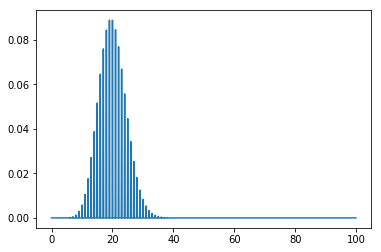

In [17]:
x=np.arange(0,100,0.1)
y=list(map(poisson_50.pmf,x))
plt.plot(x,y)

In [18]:
# Sacar unas muestras y hacer los tests de normalidad

In [19]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


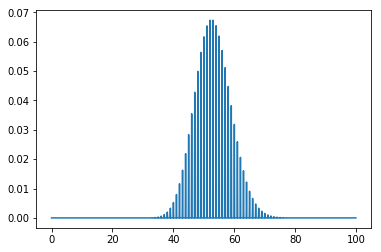

In [20]:
x=np.arange(0,100,0.1)
y=list(map(stats.poisson(loc=18, mu=35).pmf,x))
plt.plot(x,y)

In [21]:
stats.ttest_1samp(a= minnesota_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)